In [148]:
# import necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import boxcox
import scipy.stats
import warnings


sns.set_palette("pastel")

sns.set_style('darkgrid')
warnings.filterwarnings("ignore")

%matplotlib inline

In [149]:
train = pd.read_csv('../data/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../data/house-prices-advanced-regression-techniques/test.csv')
submission = pd.read_csv('../data/house-prices-advanced-regression-techniques/sample_submission.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [150]:
print(f'The shape of the train {train.shape}')
print(f'The shape of the test {test.shape}')
print(f'The shape of the submission{submission.shape}')

The shape of the train (1460, 81)
The shape of the test (1459, 80)
The shape of the submission(1459, 2)


In [151]:
train.drop('Id', axis=1, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [152]:
taget = train.SalePrice

In [153]:
train.describe()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [154]:
describe=train.describe().T
describe['nunique']=train.nunique()
describe['NULLS']=train.isna().sum()
describe

,count,mean,std,min,25%,50%,75%,max,nunique,NULLS
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0,15,0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0,110,259
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0,1073,0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0,10,0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0,9,0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0,112,0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0,61,0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0,327,8
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0,637,0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0,144,0


In [155]:
train[['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']].isnull().sum()

FullBath        0
HalfBath        0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

In [156]:
train[['1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'GarageArea']].isnull().sum()

1stFlrSF       0
2ndFlrSF       0
TotalBsmtSF    0
GarageArea     0
dtype: int64

In [157]:
# Creating the Total Number of Bathrooms feature
train['TotalBathrooms'] = train['FullBath'] + (0.5 * train['HalfBath']) + \
                         train['BsmtFullBath'] + (0.5 * train['BsmtHalfBath'])

# Creating the Total Square Footage feature
train['TotalSqFt'] = train['1stFlrSF'] + train['2ndFlrSF'] + train['TotalBsmtSF'] + train['GarageArea']

# Display the first few rows to verify the new features
train[['TotalBathrooms', 'TotalSqFt']].head()


,TotalBathrooms,TotalSqFt
0,3.5,3114
1,2.5,2984
2,3.5,3314
3,2.0,3115
4,3.5,4179


In [158]:
train.shape

(1460, 82)

In [159]:
# Checking for the presence of relevant columns for ratio features
ratio_columns = ['LotFrontage', 'LotArea', 'TotRmsAbvGrd', 'BedroomAbvGr', 'GrLivArea']

# Check if these columns exist in the trainset
ratio_columns_present = all(column in train.columns for column in ratio_columns)

# Creating the ratio features if the columns are present
if ratio_columns_present:
    # LotFrontage to LotArea Ratio
    train['LotFrontageLotAreaRatio'] = train['LotFrontage'] / train['LotArea']
    
    # Room-to-Bedroom Ratio
    train['RoomBedroomRatio'] = train['TotRmsAbvGrd'] / train['BedroomAbvGr']
    
    # GrLivArea to TotalSqFt Ratio
    train['GrLivAreaTotalSqFtRatio'] = train['GrLivArea'] / train['TotalSqFt']
    
    # Bedroom to TotalSqFt Ratio
    train['BedroomTotalSqFtRatio'] = train['BedroomAbvGr'] / train['TotalSqFt']

    # Display the first few rows to verify the new features
    new_ratio_features = train[['LotFrontageLotAreaRatio', 'RoomBedroomRatio', 
                              'GrLivAreaTotalSqFtRatio', 'BedroomTotalSqFtRatio']].head()
else:
    new_ratio_features = "Required columns for creating ratio features are not all present."

new_ratio_features


,LotFrontageLotAreaRatio,RoomBedroomRatio,GrLivAreaTotalSqFtRatio,BedroomTotalSqFtRatio
0,0.007692,2.666667,0.549133,0.000963
1,0.008333,2.000000,0.422922,0.001005
2,0.006044,2.000000,0.538926,0.000905
3,0.006283,2.333333,0.551204,0.000963
4,0.005891,2.250000,0.525963,0.000957


In [160]:
# Creating a new datetime column from YrSold and MoSold
train['SaleDateTime'] = pd.to_datetime(train['YrSold'].astype(str) + '-' + train['MoSold'].astype(str) + '-01')
test['SaleDateTime'] = pd.to_datetime(test['YrSold'].astype(str) + '-' + test['MoSold'].astype(str) + '-01')


# Display the first few rows to verify the new SaleDateTime column
train[['YrSold', 'MoSold', 'SaleDateTime']].head()


,YrSold,MoSold,SaleDateTime
0,2008,2,2008-02-01
1,2007,5,2007-05-01
2,2008,9,2008-09-01
3,2006,2,2006-02-01
4,2008,12,2008-12-01


In [161]:
train[['SaleDateTime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   SaleDateTime  1460 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 11.5 KB


In [162]:
# Separating numerical and categorical columns
numerical_cols = train.select_dtypes(include=['int64', 'float64'])
numerical_cols.drop(columns=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold'], inplace= True)
categorical_cols = train.select_dtypes(include=['object'])

numerical_cols.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,ScreenPorch,PoolArea,MiscVal,SalePrice,TotalBathrooms,TotalSqFt,LotFrontageLotAreaRatio,RoomBedroomRatio,GrLivAreaTotalSqFtRatio,BedroomTotalSqFtRatio
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,208500,3.5,3114,0.007692,2.666667,0.549133,0.000963
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,181500,2.5,2984,0.008333,2.000000,0.422922,0.001005
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,0,0,223500,3.5,3314,0.006044,2.000000,0.538926,0.000905
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,140000,2.0,3115,0.006283,2.333333,0.551204,0.000963
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,0,0,250000,3.5,4179,0.005891,2.250000,0.525963,0.000957


In [163]:
categorical_cols.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


<Axes: >

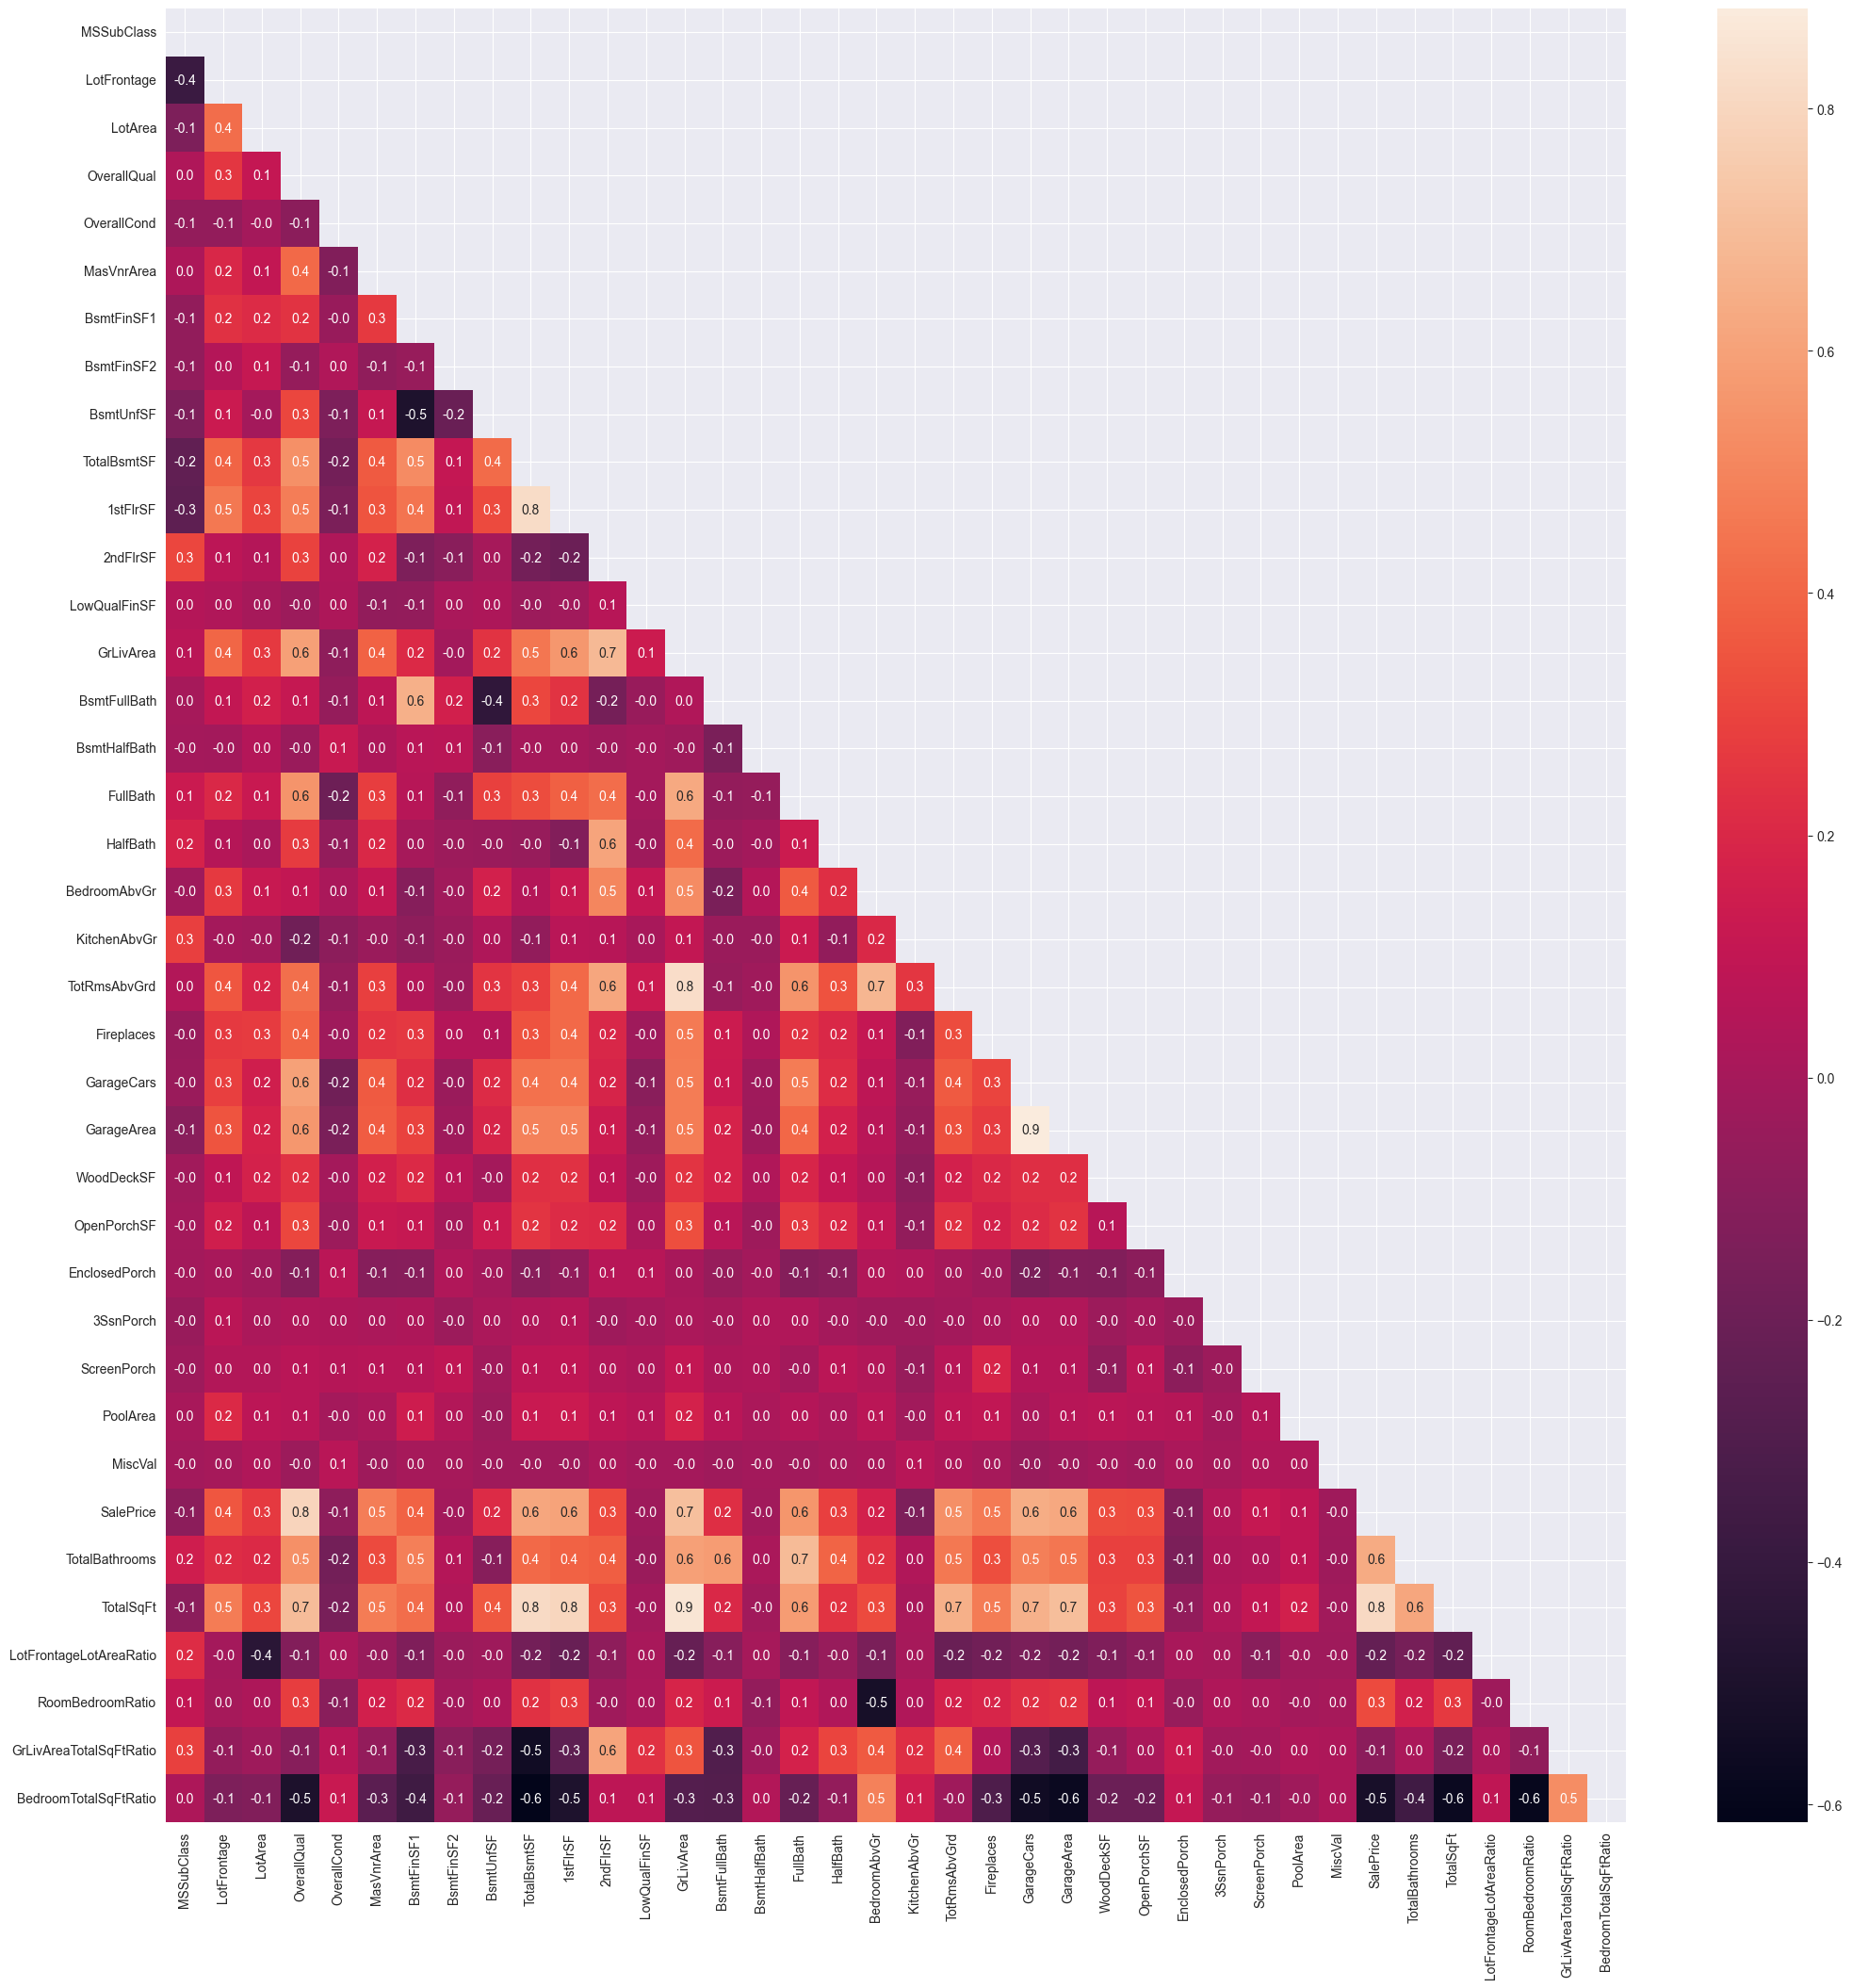

In [164]:
# Visualize the matrix on a heatmap
mask = np.triu(numerical_cols.corr())
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(data=numerical_cols.corr(), annot=True, fmt=".1f", ax=ax, mask=mask)

<Axes: >

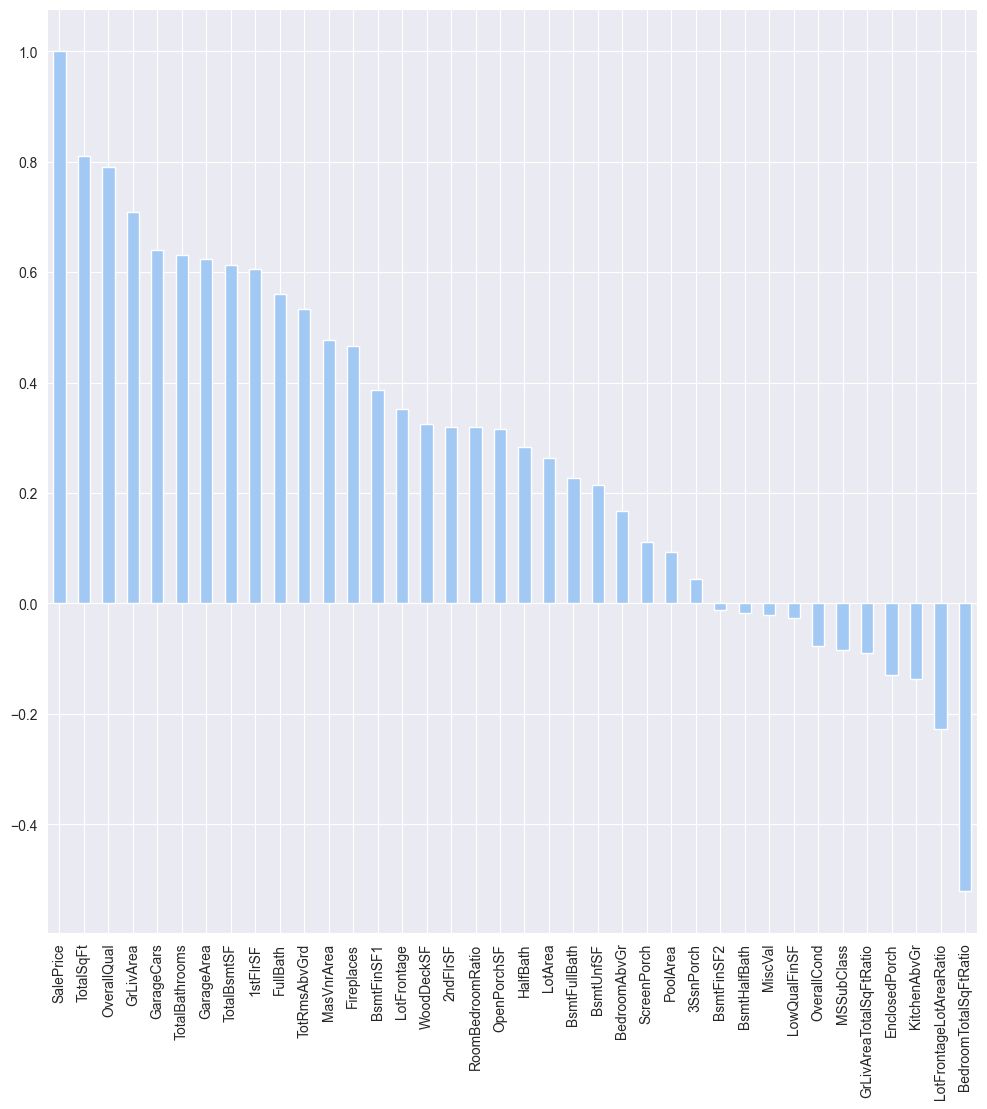

In [165]:
# Bar plot to visualize what physicochemical properties correlate more with the quality
fig, ax = plt.subplots(figsize=(12,12))
numerical_cols.corr()["SalePrice"].sort_values(ascending=False).plot(kind="bar", ax=ax)

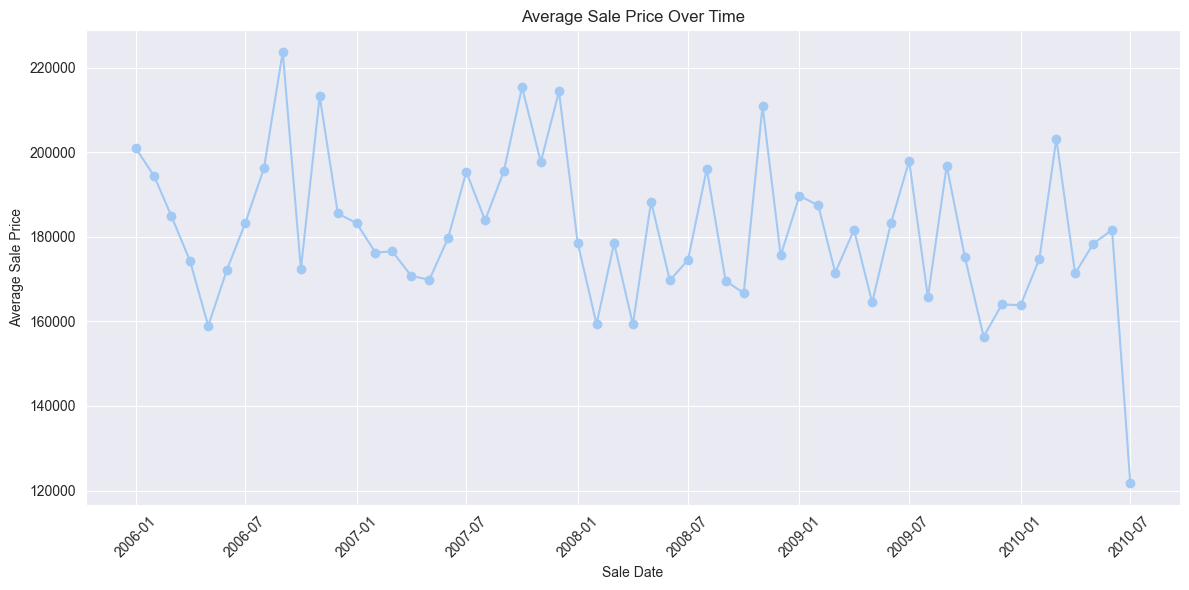

In [166]:
# Correctly grouping by SaleDateTime (by month and year) and calculating the average SalePrice for each group
monthly_sale_prices = train.groupby(train['SaleDateTime'].dt.to_period("M"))['SalePrice'].mean()

# Converting the period index back to datetime for plotting
monthly_sale_prices.index = monthly_sale_prices.index.to_timestamp()

# Creating the line plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sale_prices, marker='o', linestyle='-')
plt.title('Average Sale Price Over Time')
plt.xlabel('Sale Date')
plt.ylabel('Average Sale Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [167]:
test[['SaleDateTime']].sort_values(by='SaleDateTime')

,SaleDateTime
1162,2006-01-01
1247,2006-01-01
1250,2006-01-01
1345,2006-01-01
1225,2006-01-01
...,...
33,2010-06-01
61,2010-06-01
0,2010-06-01
118,2010-07-01


In [168]:
def nulls_per(df):
    # Assuming 'train' is your DataFrame
    missing_values = df.isnull().sum()
    total_rows = df.shape[0]

    # Create a DataFrame to display the missing values information
    missing_info = pd.DataFrame({
        'Column': missing_values.index,
        'Missing Values': missing_values.values,
        'Percentage': (missing_values / total_rows) * 100
    })

    # Filter the DataFrame to show only columns with missing values
    columns_with_missing_values = missing_info[missing_info['Missing Values'] > 0]

    # Display the filtered information
    print(f"\nColumns with Missing Values , the shape: {df.shape}")
    return columns_with_missing_values.sort_values(by='Missing Values', ascending=False)

nulls_per(numerical_cols)


Columns with Missing Values , the shape: (1460, 38)


,Column,Missing Values,Percentage
LotFrontage,LotFrontage,259,17.739726
LotFrontageLotAreaRatio,LotFrontageLotAreaRatio,259,17.739726
MasVnrArea,MasVnrArea,8,0.547945


In [169]:
numerical_cols[numerical_cols.columns[numerical_cols.isnull().any()]]

,LotFrontage,MasVnrArea,LotFrontageLotAreaRatio
0,65.0,196.0,0.007692
1,80.0,0.0,0.008333
2,68.0,162.0,0.006044
3,60.0,0.0,0.006283
4,84.0,350.0,0.005891
...,...,...,...
1455,62.0,0.0,0.007831
1456,85.0,119.0,0.006452
1457,66.0,0.0,0.007299
1458,68.0,0.0,0.006998
